In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from math import nan

from CASutils import averaging_utils as avg

In [2]:
plotpath="/project/cas/islas/python_plots/CAM7_vertres_paper/FIGURES/"

In [3]:
dz800_tem = xr.open_dataset("/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/TEMdiags/mon/dz800_80km.nc")
dz700_tem = xr.open_dataset("/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/TEMdiags/mon/dz700_80km.nc")
dz600_tem = xr.open_dataset("/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/TEMdiags/mon/dz600_80km.nc")
dz500_tem = xr.open_dataset("/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/TEMdiags/mon/dz500_80km.nc")
era5_tem = xr.open_dataset("/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/TEMdiags/mon/ERA5.nc")

jra55_uzm = xr.open_mfdataset("/project/cas/islas/python_savs/CAM7_vertres_paper/RAW_DATA/JRA55/Uzm/Uzm*.nc")
monstr = xr.DataArray(jra55_uzm.indexes['time'].strftime('%Y%m'), coords=jra55_uzm.time.coords, name='monstr')
time = jra55_uzm.time.groupby(monstr).mean('time')
jra55_uzm = jra55_uzm.groupby(monstr).mean('time')
jra55_uzm = jra55_uzm.rename({'monstr':'time'})
jra55_uzm['time'] = time.values
#jra55_uzm = jra55_uzm.drop_vars('monstr')

merra2_uzm = xr.open_mfdataset("/project/cas/islas/python_savs/CAM7_vertres_paper/RAW_DATA/MERRA2/Uzm/Uzm*.nc")
monstr = xr.DataArray(merra2_uzm.indexes['time'].strftime('%Y%m'), coords=merra2_uzm.time.coords, name='monstr')
time = merra2_uzm.time.groupby(monstr).mean('time')
merra2_uzm = merra2_uzm.groupby(monstr).mean('time')
merra2_uzm = merra2_uzm.rename({'monstr':'time'})
merra2_uzm['time'] = time.values


dz800_tem = dz800_tem.isel(time=slice(12,dz800_tem.time.size))
dz700_tem = dz700_tem.isel(time=slice(12,dz700_tem.time.size))
dz600_tem = dz600_tem.isel(time=slice(12,dz600_tem.time.size))
dz500_tem = dz500_tem.isel(time=slice(12,dz500_tem.time.size))
era5_tem = era5_tem.isel(time=slice(12,era5_tem.time.size))
merra2_uzm = merra2_uzm.isel(time=slice(12, merra2_uzm.time.size))
jra55_uzm = jra55_uzm.isel(time=slice(12, jra55_uzm.time.size))



# convert the pressure axis of era5 into hPa
era5_tem['plev'] = era5_tem.plev/100.


dz800_tem_tr = avg.cosweightlat(dz800_tem.uzm,-5,5)
dz700_tem_tr = avg.cosweightlat(dz700_tem.uzm,-5,5)
dz600_tem_tr = avg.cosweightlat(dz600_tem.uzm,-5,5)
dz500_tem_tr = avg.cosweightlat(dz500_tem.uzm,-5,5)
era5_tem_tr = avg.cosweightlat(era5_tem.uzm,-5,5)
jra55_uzm_tr = avg.cosweightlat(jra55_uzm.Uzm, -5, 5)
merra2_uzm_tr = avg.cosweightlat(merra2_uzm.Uzm, -5, 5)


dz800_tem_tr = dz800_tem_tr.groupby('time.month') - dz800_tem_tr.groupby('time.month').mean('time')
dz700_tem_tr = dz700_tem_tr.groupby('time.month') - dz700_tem_tr.groupby('time.month').mean('time')
dz600_tem_tr = dz600_tem_tr.groupby('time.month') - dz600_tem_tr.groupby('time.month').mean('time')
dz500_tem_tr = dz500_tem_tr.groupby('time.month') - dz500_tem_tr.groupby('time.month').mean('time')
era5_tem_tr = era5_tem_tr.groupby('time.month') - era5_tem_tr.groupby('time.month').mean('time')
jra55_uzm_tr_deseas = jra55_uzm_tr.groupby('time.month') - jra55_uzm_tr.groupby('time.month').mean('time')
merra2_uzm_tr_deseas = merra2_uzm_tr.groupby('time.month') - merra2_uzm_tr.groupby('time.month').mean('time')


dd_dz800 = np.sqrt(2)*dz800_tem_tr.std('time')
dd_dz700 = np.sqrt(2)*dz700_tem_tr.std('time')
dd_dz600 = np.sqrt(2)*dz600_tem_tr.std('time')
dd_dz500 = np.sqrt(2)*dz500_tem_tr.std('time')
dd_era5 = np.sqrt(2)*era5_tem_tr.std('time')
dd_jra55 = np.sqrt(2)*jra55_uzm_tr_deseas.std('time').load()
dd_merra2 = np.sqrt(2)*merra2_uzm_tr_deseas.std('time').load()

DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat


In [4]:
taper25=xr.open_dataset("/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/TEMdiags/mon/taper25_80km.nc")
taper20=xr.open_dataset("/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/TEMdiags/mon/taper20_80km.nc")
taper15=xr.open_dataset("/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/TEMdiags/mon/taper15_80km.nc")

taper25=taper25.isel(time=slice(12,taper25.time.size))
taper20=taper20.isel(time=slice(12,taper20.time.size))
taper15=taper15.isel(time=slice(12,taper15.time.size))

taper25_tr = avg.cosweightlat(taper25.uzm,-5,5)
taper20_tr = avg.cosweightlat(taper20.uzm,-5,5)
taper15_tr = avg.cosweightlat(taper15.uzm,-5,5)

taper25_tr = taper25_tr.groupby('time.month') - taper25_tr.groupby('time.month').mean('time')
taper20_tr = taper20_tr.groupby('time.month') - taper20_tr.groupby('time.month').mean('time')
taper15_tr = taper15_tr.groupby('time.month') - taper15_tr.groupby('time.month').mean('time')

dd_taper25 = np.sqrt(2)*taper25_tr.std('time')
dd_taper20 = np.sqrt(2)*taper20_tr.std('time')
dd_taper15 = np.sqrt(2)*taper15_tr.std('time')

DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat


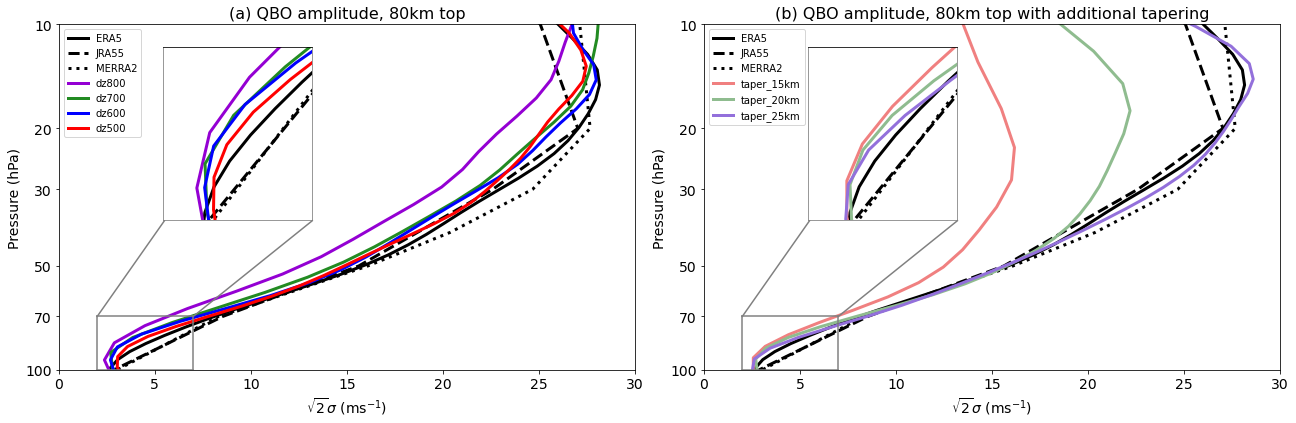

In [5]:
fig = plt.figure(figsize=(16,16))

#---Dunkerton and Delisi amplitude
ax = fig.add_axes([0.0,0.7,0.5,0.3])
ax.set_ylim(-np.log10(100),-np.log10(10))
ax.set_yticks([-np.log10(100),-np.log10(70),-np.log10(50),-np.log10(30),-np.log10(20),-np.log10(10)])
ax.set_yticklabels(['100','70','50','30','20','10'], fontsize=14)
ax.set_ylabel('Pressure (hPa)', fontsize=14)
ax.set_xticks([0,5,10,15,20,25,30])
ax.set_xticklabels(['0','5','10','15','20','25','30'], fontsize=14)
ax.set_xlabel('$\sqrt{2}\sigma$ (ms$^{-1}$)', fontsize=14)
ax.set_title('(a) QBO amplitude, 80km top', fontsize=16)
ax.set_xlim(0,30)

ax.plot(dd_era5, -np.log10(dd_era5.plev), color='black', linewidth=3, label='ERA5')
ax.plot(dd_jra55, -np.log10(dd_jra55.pre), color='black', linewidth=3, linestyle='dashed', label='JRA55')
ax.plot(dd_merra2, -np.log10(dd_merra2.lev), color='black', linewidth=3, linestyle='dotted', label='MERRA2')

ax.plot(dd_dz800, -np.log10(dd_dz800.ilev), color='darkviolet', linewidth=3, label='dz800')
ax.plot(dd_dz700, -np.log10(dd_dz700.ilev), color='forestgreen', linewidth=3, label='dz700')
ax.plot(dd_dz600, -np.log10(dd_dz600.ilev), color='blue', linewidth=3, label='dz600')
ax.plot(dd_dz500, -np.log10(dd_dz500.ilev), color='red', linewidth=3, label='dz500')

ax.plot([2,7],[-np.log10(100),-np.log10(100)], color='gray')
ax.plot([2,7],[-np.log10(70),-np.log10(70)], color='gray')
ax.plot([2,2],[-np.log10(100),-np.log10(70)], color='gray')
ax.plot([7,7],[-np.log10(100),-np.log10(70)], color='gray')

ax.plot([2,5.5],[-np.log10(70),-np.log10(37)], color='gray')
ax.plot([7,13.2],[-np.log10(70),-np.log10(37)], color='gray')

ax.legend()

ax = fig.add_axes([0.09,0.83,0.13,0.15])
ax.set_ylim(-np.log10(100),-np.log10(70))
ax.set_xlim(1.,7)
ax.set_yticks([-np.log10(100),-np.log10(90),-np.log10(80),-np.log10(70)])
ax.set_yticklabels(['100','90','80','70'])
ax.spines['bottom'].set_color('gray')
ax.spines['top'].set_color=('gray')
ax.spines['left'].set_color('gray')
ax.spines['right'].set_color('gray')
ax.set_xticks([])
ax.set_yticks([])

ax.plot(dd_era5, -np.log10(dd_era5.plev), color='black', linewidth=3, label='ERA5')
ax.plot(dd_jra55, -np.log10(dd_jra55.pre), color='black', linewidth=3, linestyle='dashed', label='JRA55')
ax.plot(dd_merra2, -np.log10(dd_merra2.lev), color='black', linewidth=3, linestyle='dotted', label='MERRA2')
ax.plot(dd_dz800, -np.log10(dd_dz800.ilev), color='darkviolet', linewidth=3, label='dz800')
ax.plot(dd_dz700, -np.log10(dd_dz700.ilev), color='forestgreen', linewidth=3, label='dz700')
ax.plot(dd_dz600, -np.log10(dd_dz600.ilev), color='blue', linewidth=3, label='dz600')
ax.plot(dd_dz500, -np.log10(dd_dz500.ilev), color='red', linewidth=3, label='dz500')




ax = fig.add_axes([0.56,0.7,0.5,0.3])
ax.set_ylim(-np.log10(100),-np.log10(10))
ax.set_yticks([-np.log10(100),-np.log10(70),-np.log10(50),-np.log10(30),-np.log10(20),-np.log10(10)])
ax.set_yticklabels(['100','70','50','30','20','10'], fontsize=14)
ax.set_ylabel('Pressure (hPa)', fontsize=14)
ax.set_xticks([0,5,10,15,20,25,30])
ax.set_xticklabels(['0','5','10','15','20','25','30'], fontsize=14)
ax.set_xlabel('$\sqrt{2}\sigma$ (ms$^{-1}$)', fontsize=14)
ax.set_title('(b) QBO amplitude, 80km top with additional tapering', fontsize=16)
ax.set_xlim(0,30)

ax.plot(dd_era5, -np.log10(dd_era5.plev), color='black', linewidth=3, label='ERA5')
ax.plot(dd_jra55, -np.log10(dd_jra55.pre), color='black', linewidth=3, linestyle='dashed', label='JRA55')
ax.plot(dd_merra2, -np.log10(dd_merra2.lev), color='black', linewidth=3, linestyle='dotted', label='MERRA2')


ax.plot(dd_taper15, -1.*np.log10(dd_taper15.ilev), color='lightcoral', label='taper_15km', linewidth=3)
ax.plot(dd_taper20, -1.*np.log10(dd_taper20.ilev), color='darkseagreen', label='taper_20km', linewidth=3)
ax.plot(dd_taper25, -1.*np.log10(dd_taper25.ilev), color='mediumpurple', label='taper_25km', linewidth=3)

ax.plot([2,7],[-np.log10(100),-np.log10(100)], color='gray')
ax.plot([2,7],[-np.log10(70),-np.log10(70)], color='gray')
ax.plot([2,2],[-np.log10(100),-np.log10(70)], color='gray')
ax.plot([7,7],[-np.log10(100),-np.log10(70)], color='gray')

ax.plot([2,5.5],[-np.log10(70),-np.log10(37)], color='gray')
ax.plot([7,13.2],[-np.log10(70),-np.log10(37)], color='gray')

ax.legend()

ax = fig.add_axes([0.09+0.56,0.83,0.13,0.15])
ax.set_ylim(-np.log10(100),-np.log10(70))
ax.set_xlim(1.,7)
ax.set_yticks([-np.log10(100),-np.log10(90),-np.log10(80),-np.log10(70)])
ax.set_yticklabels(['100','90','80','70'])
ax.spines['bottom'].set_color('gray')
ax.spines['top'].set_color=('gray')
ax.spines['left'].set_color('gray')
ax.spines['right'].set_color('gray')
ax.set_xticks([])
ax.set_yticks([])

ax.plot(dd_era5, -np.log10(dd_era5.plev), color='black', linewidth=3, label='ERA5')
ax.plot(dd_jra55, -np.log10(dd_jra55.pre), color='black', linewidth=3, linestyle='dashed', label='JRA55')
ax.plot(dd_merra2, -np.log10(dd_merra2.lev), color='black', linewidth=3, linestyle='dotted', label='MERRA2')

ax.plot(dd_taper15, -1.*np.log10(dd_taper15.ilev), color='lightcoral', label='taper_15km', linewidth=3)
ax.plot(dd_taper20, -1.*np.log10(dd_taper20.ilev), color='darkseagreen', label='taper_20km', linewidth=3)
ax.plot(dd_taper25, -1.*np.log10(dd_taper25.ilev), color='mediumpurple', label='taper_25km', linewidth=3)


fig.savefig(plotpath+'fig13.pdf', bbox_inches='tight', facecolor='white')